In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load and preprocess CIFAR-10
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)
    return x_train, x_test, y_train, y_test

In [3]:
# Wide Residual Block
def wide_residual_block(x, filters, widen_factor=4):
    shortcut = x
    x = layers.Conv2D(filters * widen_factor, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters * widen_factor, (3, 3), padding='same')(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = layers.Conv2D(filters * widen_factor, (1, 1), padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


In [4]:
# Build Wide ResNet-like model
def build_model():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(inputs)
    x = wide_residual_block(x, filters=16, widen_factor=4)
    x = layers.MaxPooling2D()(x)

    x = wide_residual_block(x, filters=32, widen_factor=4)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [5]:
# Plotting utilities
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


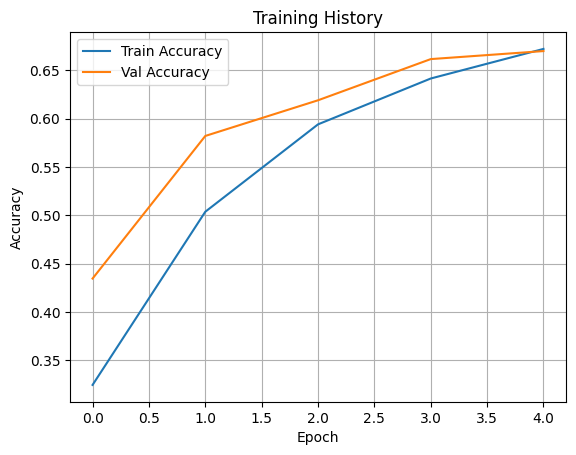

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1000
           1       0.73      0.90      0.81      1000
           2       0.53      0.57      0.55      1000
           3       0.43      0.63      0.51      1000
           4       0.60      0.60      0.60      1000
           5       0.62      0.48      0.54      1000
           6       0.69      0.79      0.73      1000
           7       0.87      0.54      0.67      1000
           8       0.78      0.84      0.81      1000
           9       0.88      0.68      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



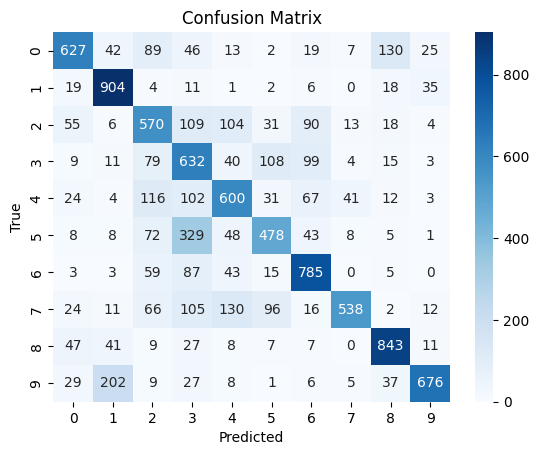

In [8]:
# Main training and evaluation pipeline
def run():
    x_train, x_test, y_train, y_test = load_data()
    model = build_model()
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64, verbose=0)

    plot_history(history)

    y_pred = model.predict(x_test)
    print("\nClassification Report:\n")
    print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
    plot_confusion_matrix(y_test, y_pred)

run()
